In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [15]:
## Import height and weight dataset
df = pd.read_csv(r"C:\Users\nstow\Desktop\Python\MaleFemaleHeightWeight.csv")

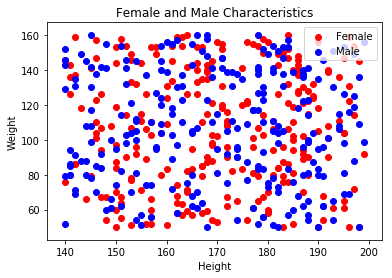

In [12]:
## create new dataframe
people = pd.DataFrame()

## assign values from imported data to new dataframe
people['height'] = df['Height']
people['weight'] = df['Weight']

## create new boolean column identifying females
people['female'] = np.where(df['Gender'] == 'Female', 1, 0)

## plot data from new data set
plt.scatter(
    people[people['female'] == 1].height,
    people[people['female'] == 1].weight,
    color='red'
)
plt.scatter(
    people[people['female'] == 0].height,
    people[people['female'] == 0].weight,
    color='blue'
)
plt.legend(['Female', 'Male'])
plt.title('Female and Male Characteristics')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Person 138 cm (6 ft) and 136 kg (300 lbs)

In [16]:
neighbors = KNeighborsClassifier(n_neighbors=1)
X = people[['height', 'weight']]
Y = people.female
neighbors.fit(X,Y)

## Predict for a person 183 cm in height and 136 kg in weight
neighbors.predict([[183, 136]])

array([0])

In [17]:
## Same prediction as above but with k of 5
neighbors = KNeighborsClassifier(n_neighbors=5)
X = people[['height', 'weight']]
Y = people.female
neighbors.fit(X,Y)

## Predict for a person 183 cm in height and 136 kg in weight
print(neighbors.predict([[183, 136]]))
print(neighbors.predict_proba([[183, 136]]))

[0]
[[0.8 0.2]]


### Person 160 cm (5 ft 1 in) and 59 kg (130 lbs)

In [18]:
neighbors = KNeighborsClassifier(n_neighbors=1)
X = people[['height', 'weight']]
Y = people.female
neighbors.fit(X,Y)

## Predict for a person 160 cm in height and 59 kg in weight
neighbors.predict([[160, 59]])

array([0])

In [20]:
## Same prediction as above but with k of 3
neighbors = KNeighborsClassifier(n_neighbors=3)
X = people[['height', 'weight']]
Y = people.female
neighbors.fit(X,Y)

## Predict for a person 183 cm in height and 136 kg in weight
print(neighbors.predict([[160, 59]]))
print(neighbors.predict_proba([[160, 59]]))

[1]
[[0.33333333 0.66666667]]


In [21]:
## Same prediction as above but with k of 5
neighbors = KNeighborsClassifier(n_neighbors=5)
X = people[['height', 'weight']]
Y = people.female
neighbors.fit(X,Y)

## Predict for a person 183 cm in height and 136 kg in weight
print(neighbors.predict([[160, 59]]))
print(neighbors.predict_proba([[160, 59]]))

[1]
[[0.2 0.8]]


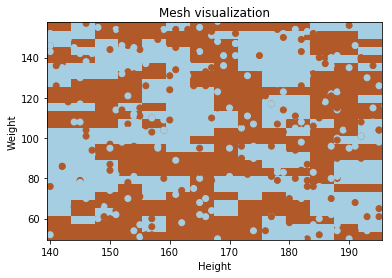

In [22]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()